<a href="https://colab.research.google.com/github/msdnarayan/Data-Science-Nissan-/blob/main/timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/monthly.csv')
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [4]:
df.shape

(847, 2)

In [5]:
#EDA

print(f"Data range of gold prices available from- {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Data range of gold prices available from- 1950-01 to 2020-07


In [6]:
date=pd.date_range(start='1/1/1950', end='8/1/2020',freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [7]:
df['month']=date
df.drop('Date',axis=1 , inplace=True)
df=df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


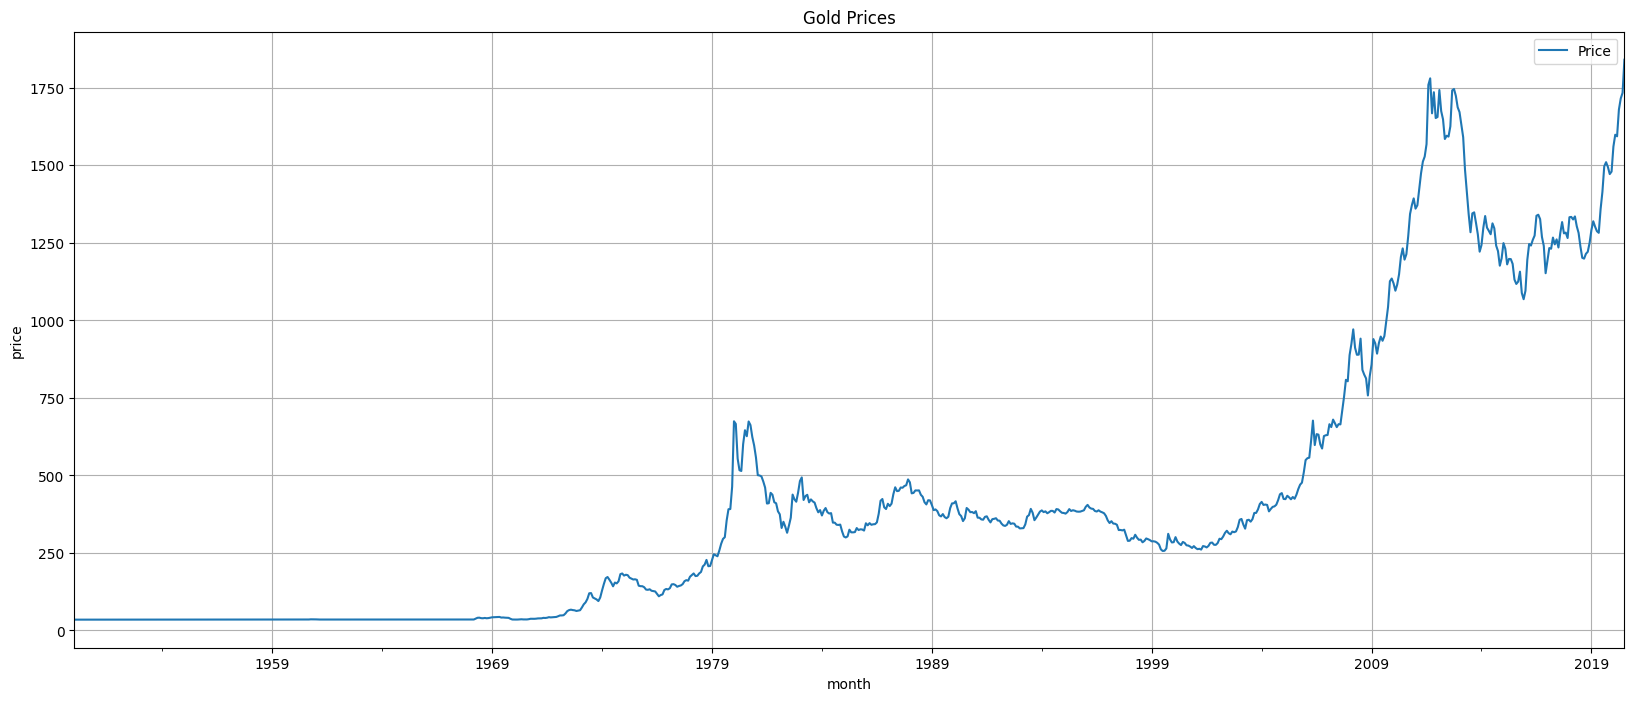

In [8]:
df.plot(figsize=(20,8))
plt.title('Gold Prices')
plt.xlabel('month')
plt.ylabel('price')
plt.grid()

In [9]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


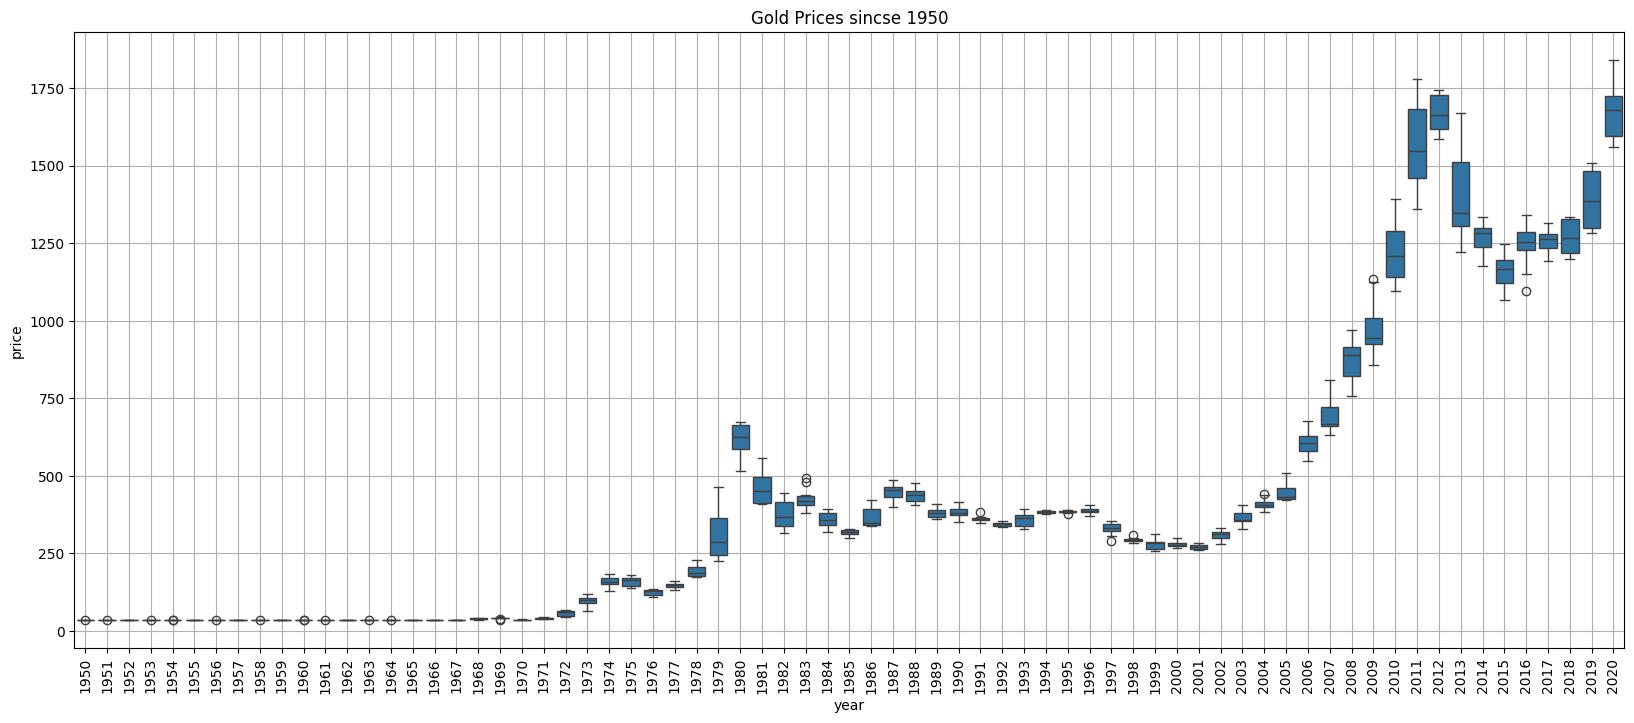

In [10]:
_, ax=plt.subplots(figsize=(20,8))
sns.boxplot(x=df.index.year,y=df.values[:,0],ax=ax)
plt.title('Gold Prices sincse 1950')
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation=90)
plt.grid()

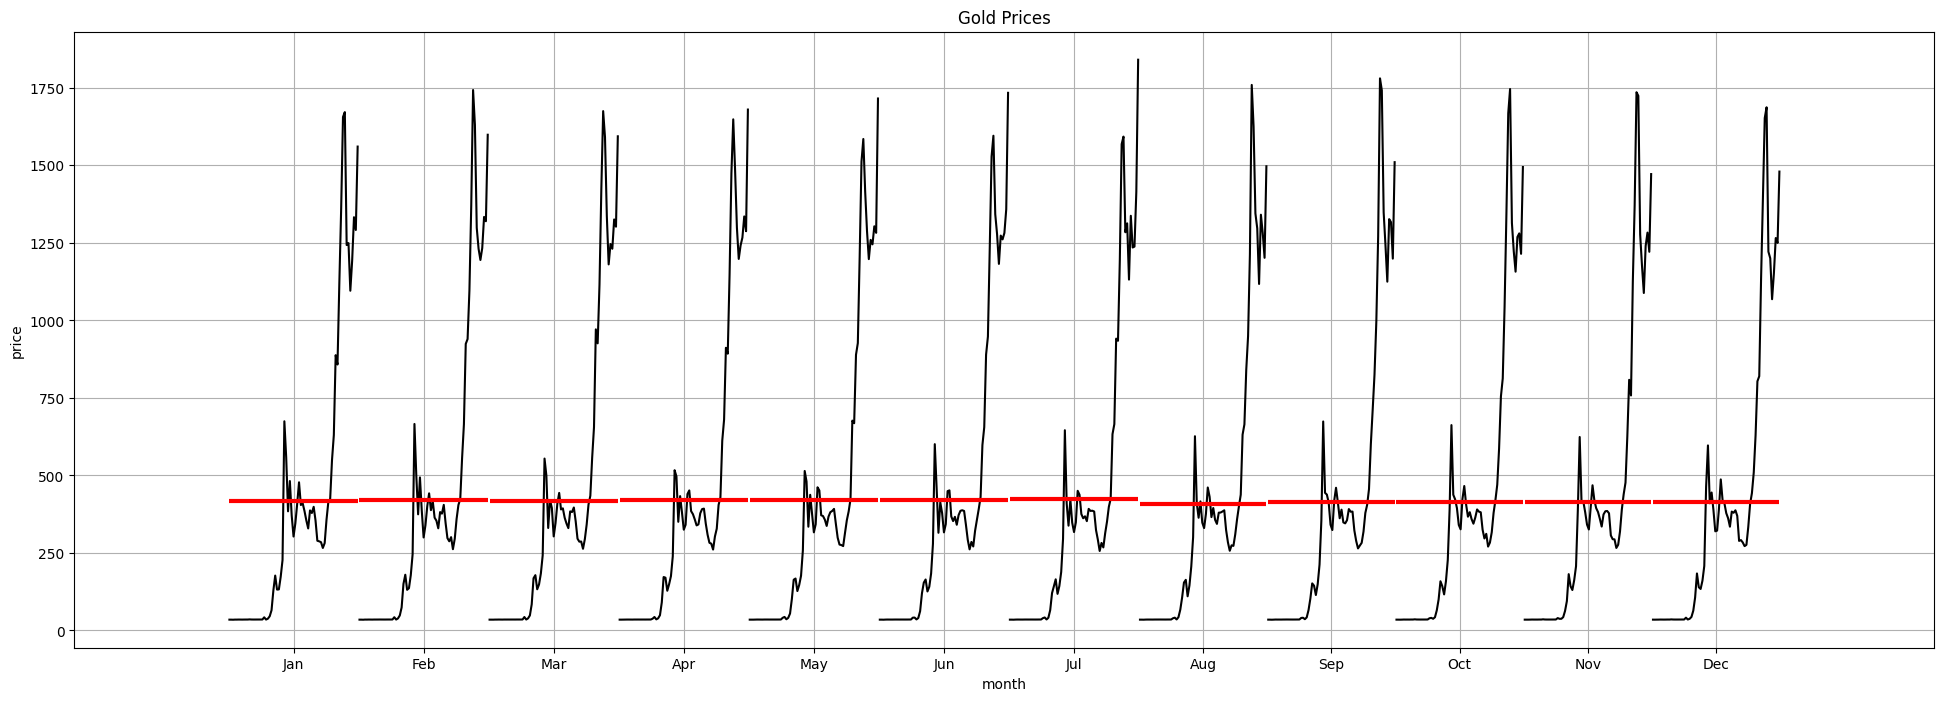

In [11]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax=plt.subplots(figsize=(24,8))
month_plot(df,ax=ax)
plt.title('Gold Prices')
plt.xlabel('month')
plt.ylabel('price')
plt.grid()

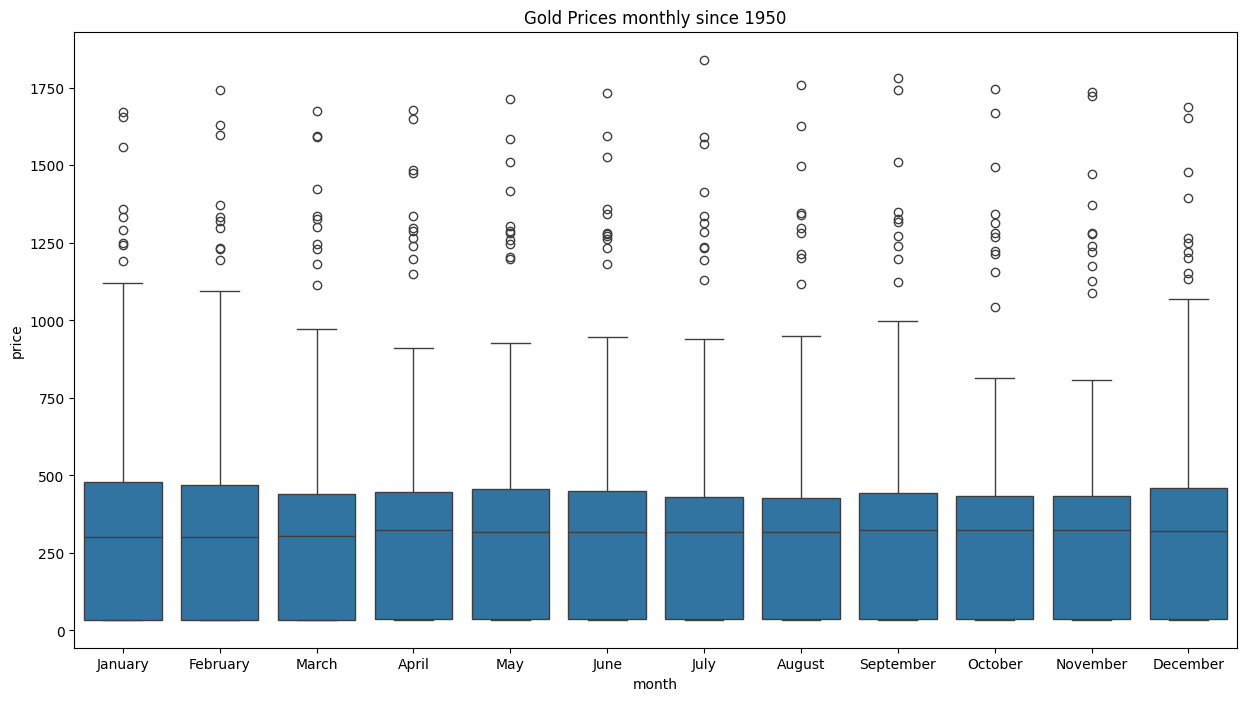

In [22]:
_, ax=plt.subplots(figsize=(15,8))
sns.boxplot(x=df.index.month_name(),y=df.values[:,0],ax=ax)
plt.title('Gold Prices monthly since 1950')
plt.xlabel('month')
plt.ylabel('price')
plt.show()

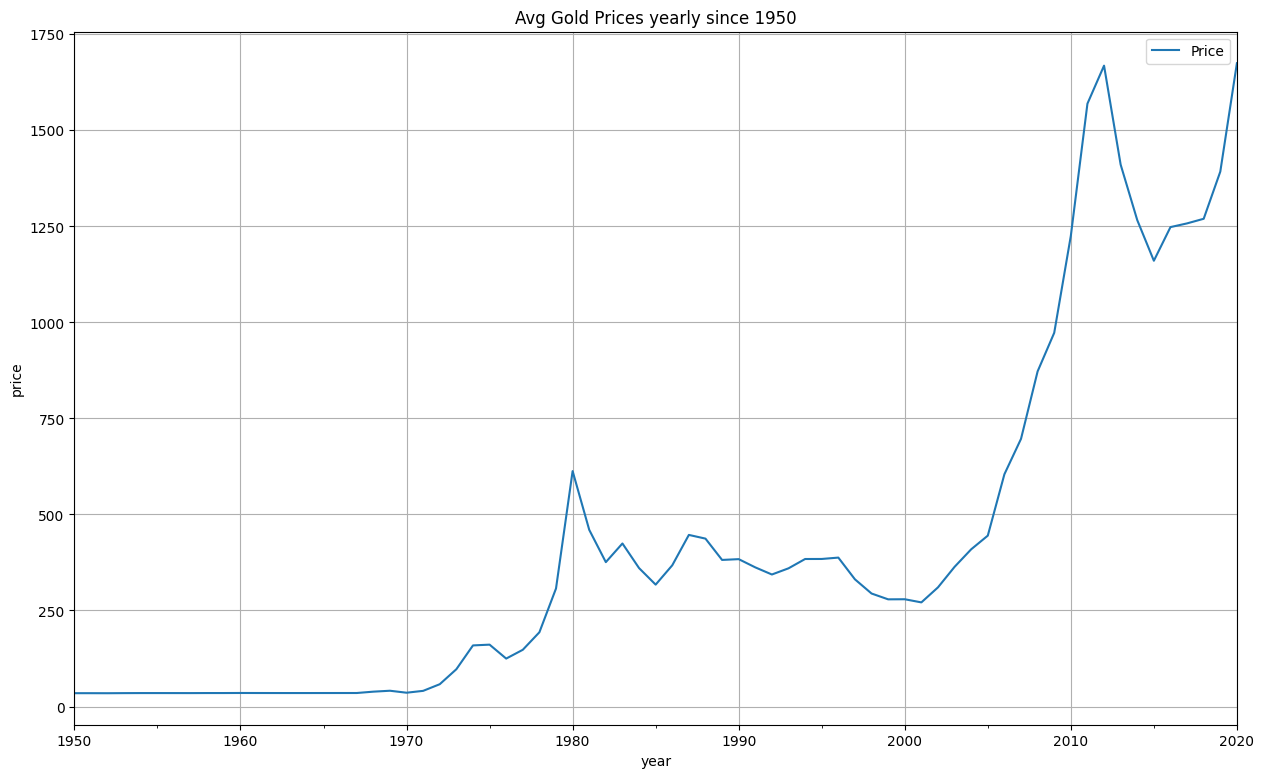

In [23]:
df_yearly_sum=df.resample('A').mean()
df_yearly_sum.plot(figsize=(15,9))
plt.title('Avg Gold Prices yearly since 1950')
plt.xlabel('year')
plt.ylabel('price')
plt.grid()

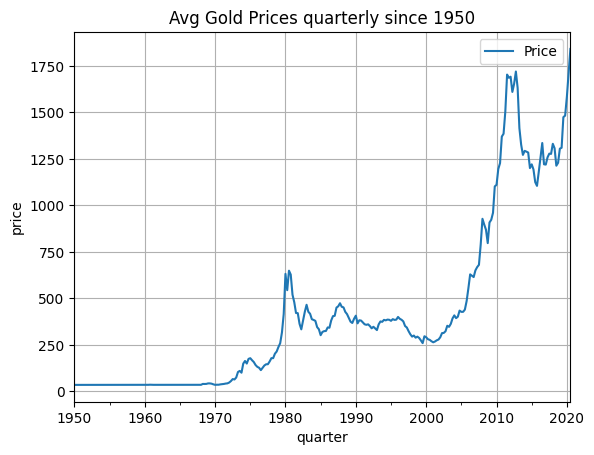

In [14]:
df_quarterly_sum=df.resample('Q').mean()
df_quarterly_sum.plot()
plt.title('Avg Gold Prices quarterly since 1950')
plt.xlabel('quarter')
plt.ylabel('price')
plt.grid()

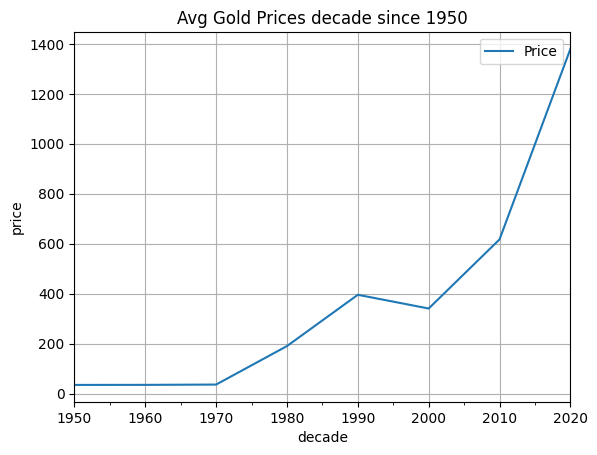

In [15]:
df_decade_sum=df.resample('10Y').mean()
df_decade_sum.plot()
plt.title('Avg Gold Prices decade since 1950')
plt.xlabel('decade')
plt.ylabel('price')
plt.grid()

In [16]:
#coefficeint of variation IN prices
df_1=df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1=df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}),left_index=True,right_index=True)
df_1['Cov']=((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,Cov
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


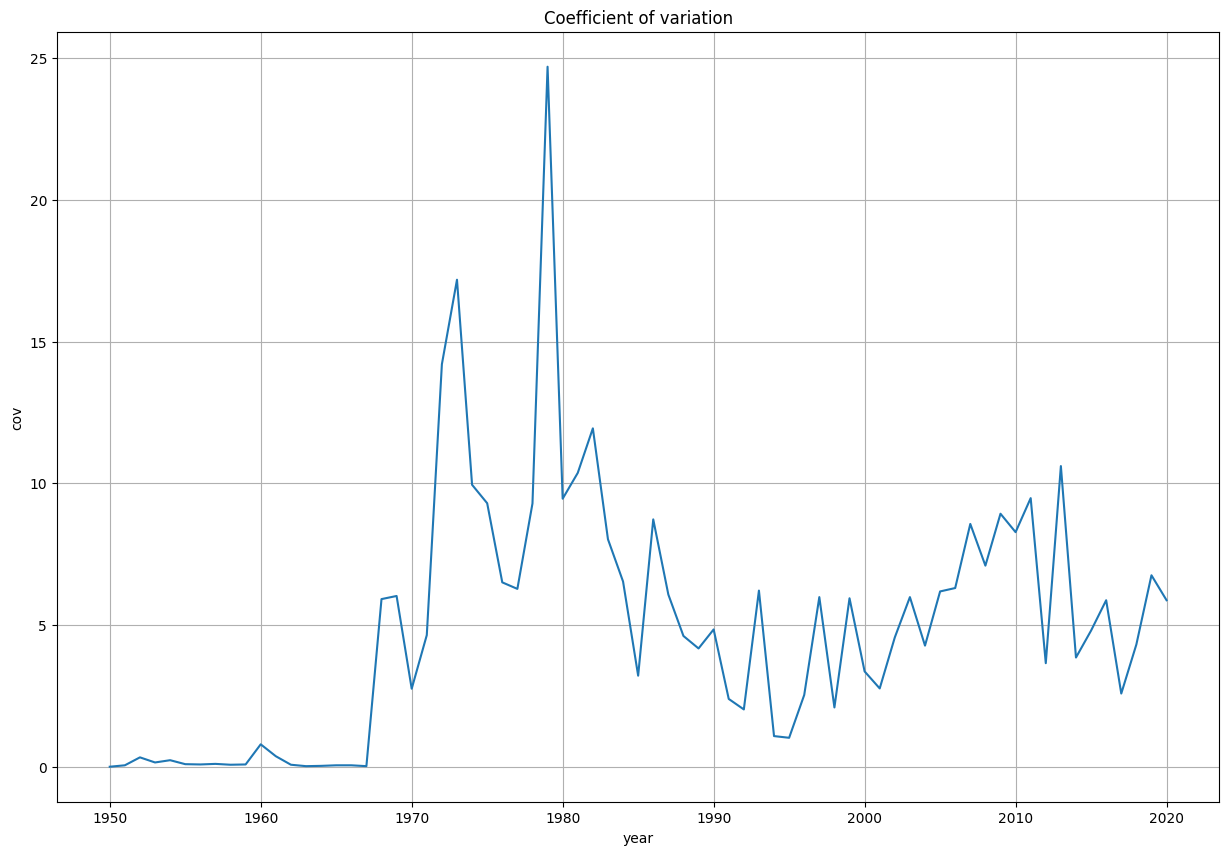

In [17]:
fig,ax=plt.subplots(figsize=(15,10))
df_1['Cov'].plot()
plt.title('Coefficient of variation')
plt.xlabel('year')
plt.ylabel('cov')
plt.grid()

In [18]:
train=df[df.index.year<=2015]
test=df[df.index.year>2015]

In [19]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


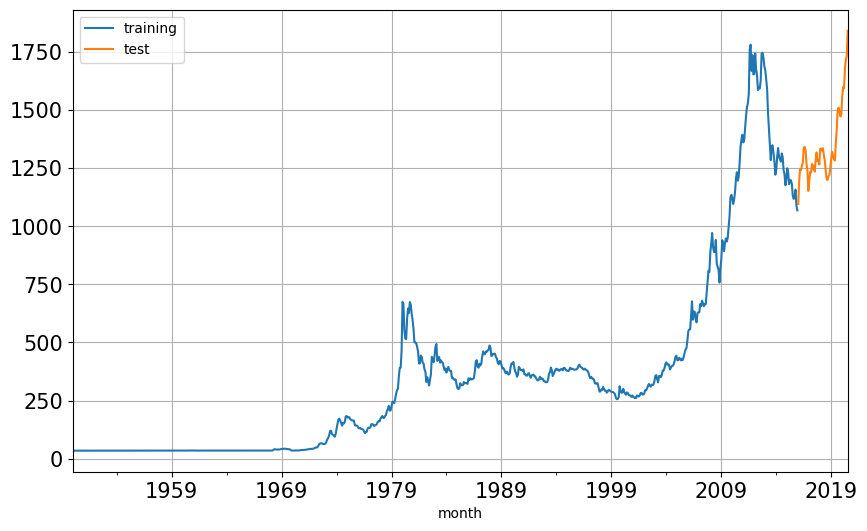

In [26]:
train["Price"].plot(figsize=(10,6),fontsize=15)
test["Price"].plot(figsize=(10,6),fontsize=15)
plt.legend(['training','test'],prop={'size': 10})
  # Adjust the size as needed

plt.grid()

In [27]:
train_time=[i+1 for i in range(len(train))]
test_time=[i+(len(train))+1 for i in range(len(test))]
len(train_time),len(test_time)

(792, 55)

In [29]:
#linear regression
LR_train=train.copy()
LR_test=test.copy()

In [30]:
LR_train['time']=train_time
LR_test['time']=test_time

In [31]:
lr=LinearRegression()
lr.fit(LR_train[['time']],LR_train['Price'].values)

LinearRegression()

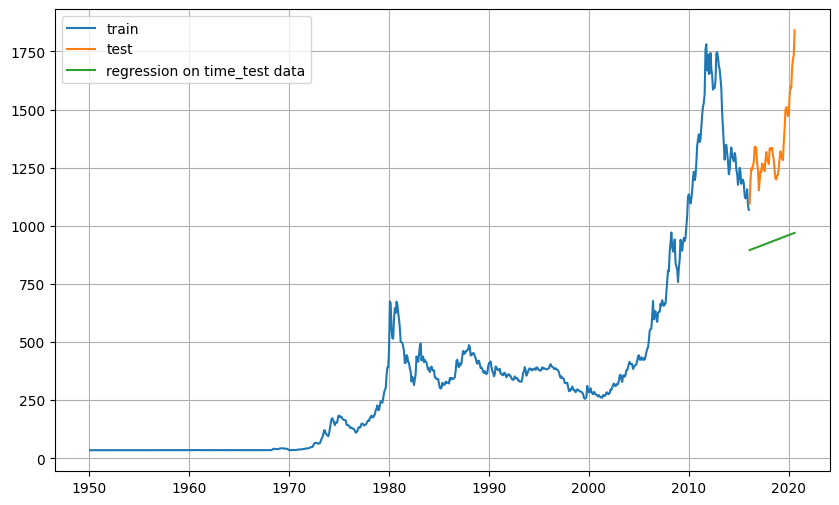

In [32]:
test_pred_model1=lr.predict(LR_test[['time']])
LR_test['forecast']=test_pred_model1

plt.figure(figsize=(10,6))
plt.plot(LR_train['Price'],label='train')
plt.plot(LR_test['Price'],label='test')
plt.plot(LR_test['forecast'],label='regression on time_test data')
plt.legend()
plt.grid()

In [36]:
#mape is the measure of predication of accuracy of a forecasting method in statistical model
def mape(actual,pred):
  return round((np.mean(abs(actual-pred)/actual))*100,2)

In [39]:
mape_test_model1=mape(test['Price'].values,test_pred_model1)
print("Mape is %3.2f"%(mape_test_model1),"%")

Mape is 29.76 %


In [41]:
results=pd.DataFrame({'test mape(%)':[mape_test_model1]},index=['RegressionOnTime'])

In [42]:
results

,test mape(%)
RegressionOnTime,29.76


In [43]:
Naive_train=train.copy()
Naive_test=test.copy()

In [46]:
Naive_test['naive']=np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

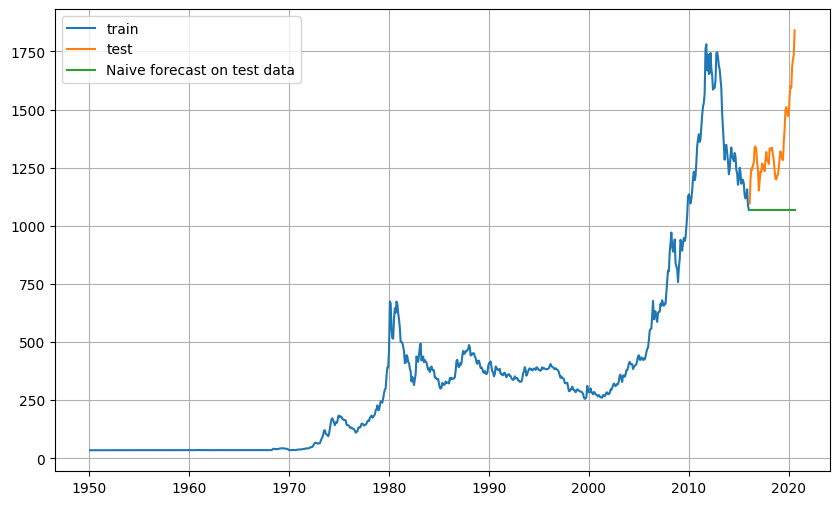

In [48]:
plt.figure(figsize=(10,6))
plt.plot(Naive_train['Price'],label='train')
plt.plot(Naive_test['Price'],label='test')
plt.plot(Naive_test['naive'],label='Naive forecast on test data')
plt.legend(loc='best')
plt.grid()

In [50]:
mape_test_model2=mape(test['Price'].values,Naive_test['naive'].values)
print("Mape is %3.2f"%(mape_test_model2),"%")

Mape is 19.38 %


In [53]:
results_2=pd.DataFrame({'test_mape2(%)':[mape_test_model2]},index=['NaiveModel'])
results=pd.concat([results,results_2])
results

,test mape(%),test_mape2(%)
RegressionOnTime,29.76,NaN
NaiveModel,NaN,19.38


In [55]:
final_model=ExponentialSmoothing(df,trend='additive',
                                 seasonal='additive').fit(smoothing_level=0.4,
                                                          smoothing_trend=0.3,
                                                          smoothing_seasonal=0.6)

In [58]:
mape_final_model=mape(df['Price'].values,final_model.fittedvalues)
print("Mape: ",mape_final_model,"%")

Mape:  17.24 %


In [61]:
prediction=final_model.forecast(steps=len(test))
pred_df=pd.DataFrame({'lower_CI':prediction-1.96*np.std(final_model.resid,ddof=1),
                      'prediction':prediction,
                      'upper_CI':prediction+1.96*np.std(final_model.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235


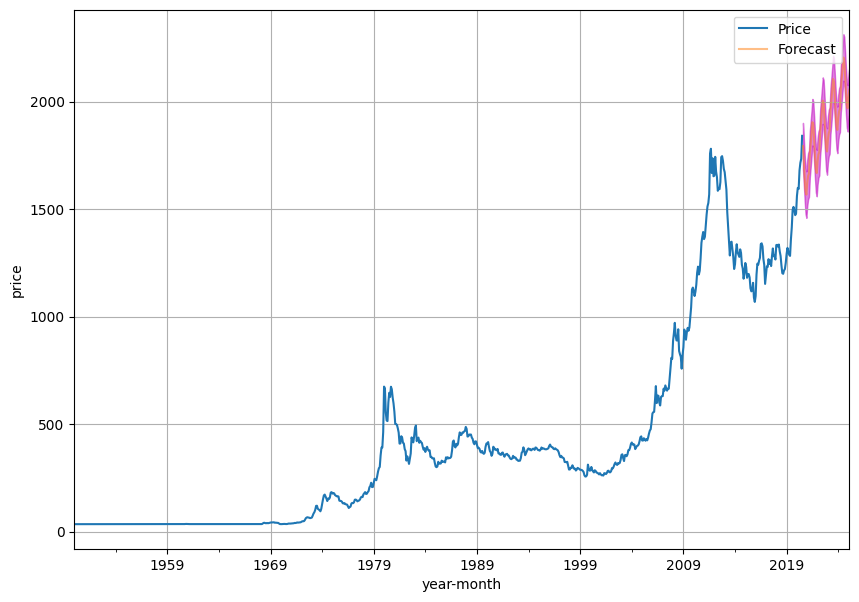

In [62]:
axis=df.plot(label='Actual',figsize=(10,7))
pred_df['prediction'].plot(ax=axis,label='Forecast',alpha=0.5)
axis.fill_between(pred_df.index,pred_df['lower_CI'],pred_df['upper_CI'],color='m',alpha=0.50)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc='best')
plt.grid()